# Q1 : k-Nearest Neighbor (kNN)


The kNN classifier consists of two stages:

- During training, the classifier takes the training data and simply remembers it
- During testing, kNN classifies every test image by comparing to all training images and transfering the labels of the k most similar training examples

For the purposes of this problem consider the N-armed spiral dataset where each arm represents a different class. Use the dataset generator in th following code cell.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode

def prepare_dataset():
  N = 100 # number of points per class
  D = 2 # dimensionality
  K = 3 # number of classes
  X = np.zeros((N*K,D)) # data matrix (each row = single example)
  Y = np.zeros(N*K, dtype='uint8') # class labels
  for j in range(K):
    ix = range(N*j,N*(j+1))
    r = np.linspace(0.0,1,N) # radius
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    Y[ix] = j
  # lets visualize the data:
  plt.scatter(X[:, 0], X[:, 1], c=Y, s=40, cmap=plt.cm.Spectral)
  plt.show()
  return X, Y

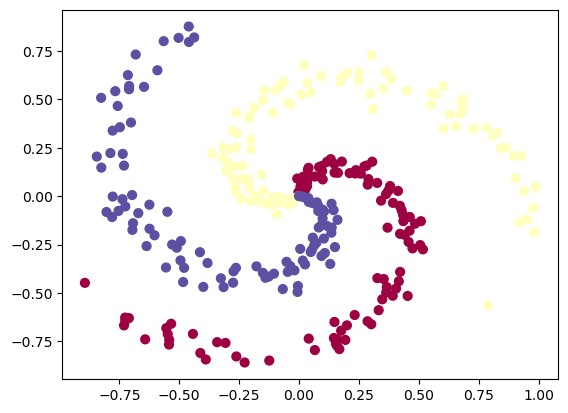

In [2]:
X,Y = prepare_dataset()

Complete the KNN classifier class  class to create an classifier model object that fits to the data (X, Y) generated  by prepare_dataset(). Using the above dataset (X,Y) fit your K-Nearest Neighbour Classifier 

- Q-1.1 Pick 5 random sample points in range [-1, 1] X [-1, 1] and print model's prediction on the same. 
- Q-1.2 Ablate for the above for k=2,5,10 \
- Q-1.3 plot the sample points superimposed on the data (annotate them with a different colour) and display the same

In [3]:
class KNN_Classifier:
    def __init__(self,  X, Y, k=1):
        '''
        Args:
            X ((num_samples, D) dimensional numpy.ndarray): input feature data
            Y ((num_samples,) dimensional numpy.ndarray): labels, represented as non negative integers
            k (int): number of nearest neighbours
        '''
        # implement your code here
        self.x = X
        self.y = Y
        self.k = k
        pass

    def distance(self, a, b, type='eucledian'):
        '''
        Args:
            a ((D,) dimensional numpy.ndarray):
            b ((D,) dimensional numpy.ndarray):
            type (string): Either of "eucledian" or "manhattan" distance 
        '''
        if type=='eucledian':
            # Implement your code
            return np.sqrt(np.sum(np.square(a-b)))
        elif type=='manhattan':
            # Implement your code 
            return np.sum(np.abs(a-b), axis=1)

    def predict(self, x):
        '''
        Args:
            x ((D,) dimensional numpy.ndarray): input sample
        Returns:
            prediction (an integer), a  mlabel
        '''
        # Implement knn inference
        num_test = x.shape[0]
        y_pred = np.zeros(num_test,dtype=self.y.dtype)
        
        for i in range(num_test):
            point_dist = []
            for j in range(len(self.x)): 
                distances = self.distance(self.x[j,:], x[i,:]) 
                #Calculating the distance
                point_dist.append(distances) 
                
            point_dist = np.array(point_dist) 
            #Sorting the array while preserving the index
            #Keeping the first K datapoints
            dist = np.argsort(point_dist)[:self.k]
            #Labels of the K datapoints from above
            labels = self.y[dist]

            #Majority voting
            lab = mode(labels) 
            lab = lab.mode[0]
            y_pred[i] = lab
        return y_pred

Q1.1
samples: [[-0.90564221 -0.81322642]
 [ 0.85898128  0.49100417]
 [ 0.90978539 -0.94128583]
 [-0.28712419  0.51409369]
 [-0.25656175 -0.47536271]]
result: [0 1 1 1 2]


Q1.2
result with k=2: [0 1 0 1 2]


C:\Users\Archit Agarwal\AppData\Local\Temp\ipykernel_6076\2891258502.py:55: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  lab = mode(labels)


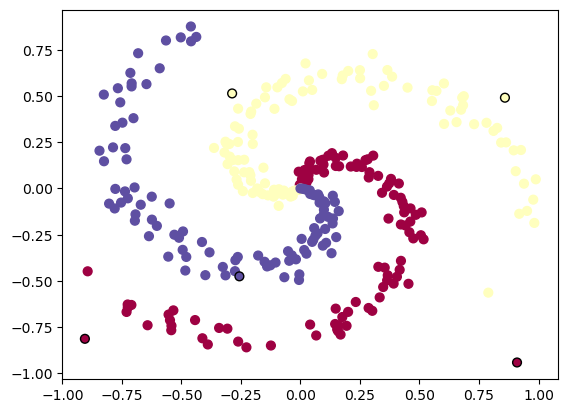

result with k=5: [0 1 0 1 2]


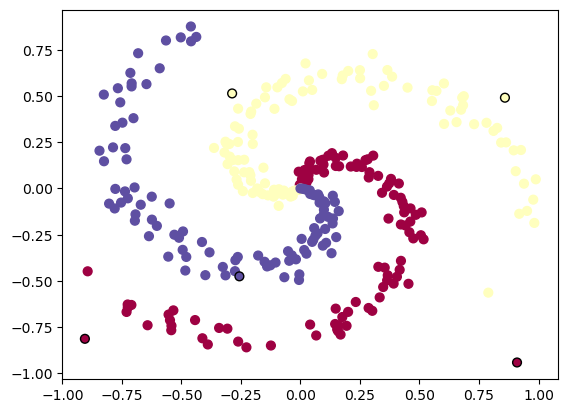

result with k=2: [0 1 0 1 2]


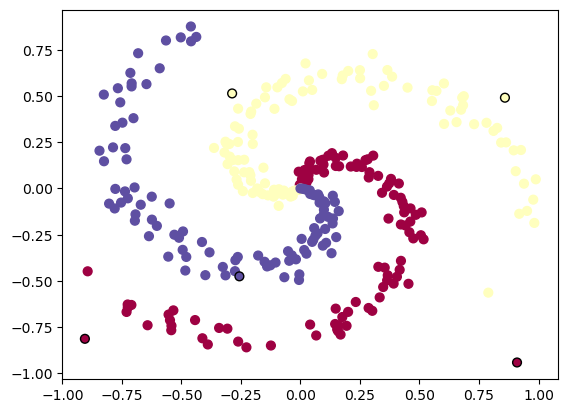

In [4]:
'''
Code for Q1.1, Q1.2 and Q1.3 below
'''
print("Q1.1")
samples = np.random.uniform(low=-1, high=1, size=[5,2])
print("samples:", samples)

knn = KNN_Classifier(X,Y)
result = knn.predict(samples)
print("result:", result)

print("\n\nQ1.2")

knn = KNN_Classifier(X,Y, 2)
result = knn.predict(samples)
print("result with k=2:", result)

plt.scatter(X[:, 0], X[:, 1], c=Y, s=40, cmap=plt.cm.Spectral)
plt.scatter(samples[:, 0], samples[:, 1], c=result, s=40, cmap=plt.cm.Spectral, edgecolors='black')
plt.show()

knn = KNN_Classifier(X,Y, 2)
result = knn.predict(samples)
print("result with k=5:", result)

plt.scatter(X[:, 0], X[:, 1], c=Y, s=40, cmap=plt.cm.Spectral)
plt.scatter(samples[:, 0], samples[:, 1], c=result, s=40, cmap=plt.cm.Spectral, edgecolors='black')
plt.show()

knn = KNN_Classifier(X,Y, 10)
result = knn.predict(samples)
print("result with k=2:", result)

plt.scatter(X[:, 0], X[:, 1], c=Y, s=40, cmap=plt.cm.Spectral)
plt.scatter(samples[:, 0], samples[:, 1], c=result, s=40, cmap=plt.cm.Spectral, edgecolors='black')
plt.show()

In [5]:
'''
All samples points are drawn with black boundary
'''

'\nAll samples points are drawn with black boundary\n'